# Zomato Restaurant Data Analysis

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

# Unzip the ZIP archive and load the dataset
with ZipFile('zomato.csv.zip', 'r') as zip_file:
    zip_file.extractall()
    zip_file.close()

# Load the dataset into a DataFrame
df = pd.read_csv('zomato.csv')

In [2]:
# Update the 'rate' column
df['rate'] = df['rate'].str.split('/').str[0]

# Convert the 'rate' column to numeric
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Convert the 'approx_cost(for two people)' column to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

## Distribution of restaurant ratings

What ratings (out of 5) do people typically give restaurants?

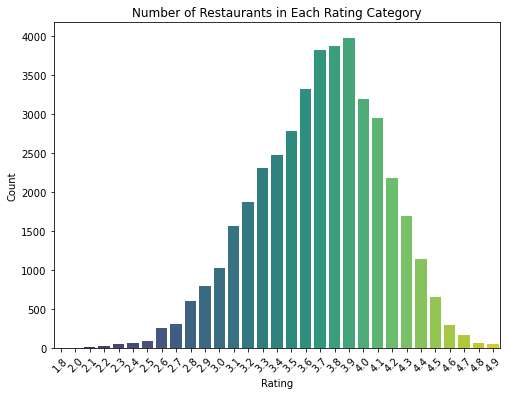

In [3]:
# Count the number of restaurants in each rating category
rating_counts = df['rate'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title('Number of Restaurants in Each Rating Category')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Most people tend to rate restaurants between 3 and 4 stars.

## Most popular cuisines

What cuisines are people leaving reviews for?

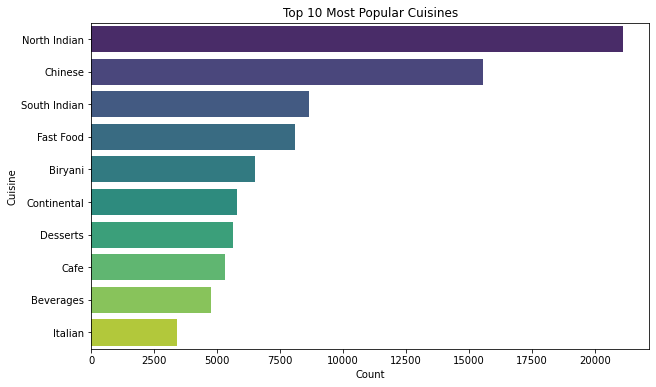

In [4]:
# Split the 'cuisines' column by commas and create a list of cuisines
df['cuisines_list'] = df['cuisines'].str.split(', ')

# Flatten the list of cuisines while ignoring NaN values
cuisines_flat = [cuisine for cuisines in df['cuisines_list'] if isinstance(cuisines, list) for cuisine in cuisines]

# Count the frequency of each cuisine
cuisine_counts = pd.Series(cuisines_flat).value_counts()

# Visualize the top cuisines
top_cuisines = cuisine_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="viridis")
plt.title('Top 10 Most Popular Cuisines')
plt.ylabel('Cuisine')
plt.xlabel('Count')
plt.show()

Most of the reviews are for North Indian, Chinese, and South Indian restaurants.

## Most popular restaurant types

What types of restaurants are people leaving reviews for (e.g., bakeries, casual dining, etc.)?

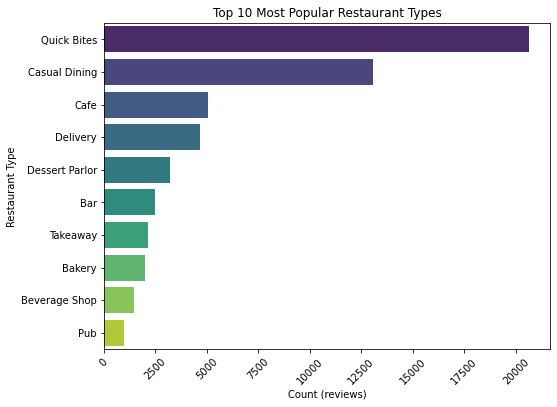

In [5]:
# Split the 'rest_type' column by commas and create a list of restaurant types
df['rest_type_list'] = df['rest_type'].str.split(', ')

# Flatten the list of restaurant types while ignoring NaN values
restaurant_types_flat = [rest_type for rest_types in df['rest_type_list'] if isinstance(rest_types, list) for rest_type in rest_types]

# Count the frequency of each restaurant type
restaurant_type_counts = pd.Series(restaurant_types_flat).value_counts()

# Visualize the top restaurant types
top_restaurant_types = restaurant_type_counts.head(10)
top_restaurant_types

plt.figure(figsize=(8, 6))
sns.barplot(x=top_restaurant_types.values, y=top_restaurant_types.index, palette="viridis")

plt.title('Top 10 Most Popular Restaurant Types')
plt.xlabel('Count (reviews)')
plt.ylabel('Restaurant Type')
plt.xticks(rotation=45)
plt.show()

People leave the most reviews for quick bites, casual dining, and cafés.

## Correlation matrix

How correlated are features like approximate cost, ratings, votes, online order availability, and ability to book a table?

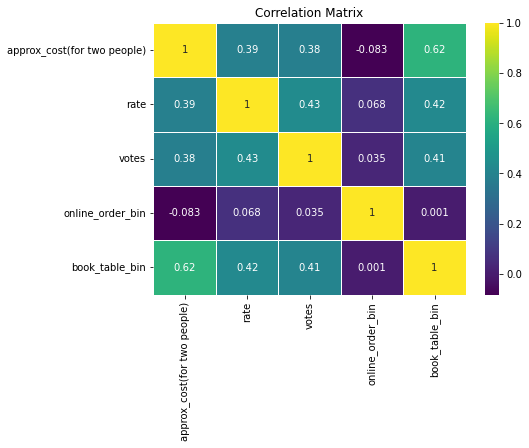

In [6]:
# Map 'online_order' and 'book_table' to binary values (0 or 1)
df['online_order_bin'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table_bin'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Select the columns of interest
selected_columns = ['approx_cost(for two people)', 'rate', 'votes', 'online_order_bin', 'book_table_bin']
df_selected = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

It appears that ability to book a table and approximate cost have the highest correlation among the above pairs of columns (correlation coefficient of 0.62). This correlation could be analyzed further with regression analysis.

# Average ratings by restaurant type

How do the ratings of restaurant types compare to each other?

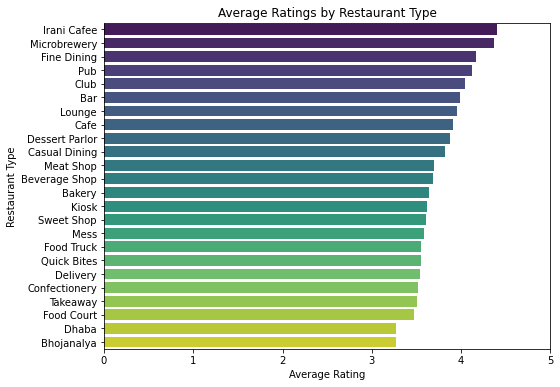

In [7]:
# Split the 'rest_type' column by commas and create a list of restaurant types
df['rest_type_list'] = df['rest_type'].str.split(', ')

# Explode the 'rest_type_list' to create separate rows for each restaurant type
exploded_df = df.explode('rest_type_list')

# Convert the 'rate' column to numeric (if not already)
exploded_df['rate'] = pd.to_numeric(exploded_df['rate'], errors='coerce')

# Filter out rows with missing or invalid ratings
filtered_df = exploded_df.dropna(subset=['rate'])

# Group by restaurant type and calculate mean rating
average_ratings_by_type = filtered_df.groupby('rest_type_list')['rate'].mean().reset_index()

# Sort by average rating
average_ratings_by_type = average_ratings_by_type.sort_values(by='rate', ascending=False).reset_index(drop=True)

# Visualize the average ratings for each restaurant type
plt.figure(figsize=(8, 6))
sns.barplot(x='rate', y='rest_type_list', data=average_ratings_by_type, orient='h', palette="viridis")
plt.title('Average Ratings by Restaurant Type')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Type')
plt.xlim(0, 5)  # Set the x-axis range to ratings scale (0-5)
plt.show()

In [8]:
# Highest rated restaurant types
average_ratings_by_type.head(3).round(2)

,rest_type_list,rate
0,Irani Cafee,4.41
1,Microbrewery,4.37
2,Fine Dining,4.17


In [9]:
# Lowest rated restaurant types
average_ratings_by_type.tail(3).round(2)

,rest_type_list,rate
21,Food Court,3.47
22,Dhaba,3.28
23,Bhojanalya,3.27


Irani Cafee restaurants tend to be rated the best while Bhojanalya restaurants tend to be rated the lowest.